# Week 5: Branching Processes

This week, we introduce and study the Galton Watson process, which is a fundamental example of so-called *branching process*. This process can be seen as a model for counting a population of individuals over generations.

For such a process, we associate a *reproduction law*, which describes the probability distribution of offspring from each individual. Following the example introduced in the problem 2 of this week's homework, let us consider the uniform distribution on $\left\{0,1,2,3 \right\}$ as our reproduction law $\pi$.

In [19]:
import numpy as np
# Change S to change the support of pi
S = [0,1,2,3]
# Define the distribution pi here:
pi = [1/4., 1/4., 1/4., 1/4.]


We now simulate the branching process for 10 generations. For $n\geq 0$, the population size at time $n+1$ is $Z_{n+1} = \sum_{i=0}^{Z_n}X_{n,i}$ if $Z_n\geq 1$, and 0 if $Z_n=0$, where the $X_{n,i}$ are iid with law $\pi$. The next cell simulates and plots one trajectory.


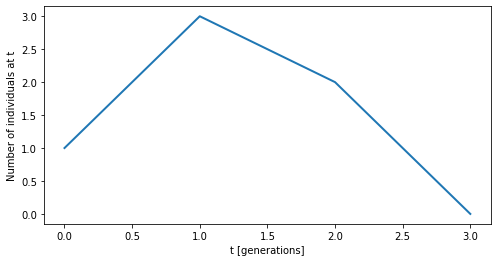

In [20]:
N = 10  # Specify the number of generations       
Z0 = 1  # Specify the initial population size  
Z=[]
Z.append(Z0)

# Run the process up until N steps or until 
# there are no individuals for some generation.
i=1
while (i<= N-1) and (Z[-1] > 0):
    # Creating the next generation
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
    # We look at the offspring of each individual of the last generation having been computed.
    next_gen = np.sum(np.random.choice(S, Z[-1], p = pi))
    Z.append(next_gen)
    # Increment counter
    i+=1
    
# Plot the trajectory obtained    
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("t [generations]")
ax.set_ylabel("Number of individuals at t")
ax.plot(Z, lw=2)

In the course, we study the probability of extinction or survival associated with the process. By simulating the process many times, we can also estimate these quantities. The following code runs the process for N generations and over M times. By reading the code, can you tell what empirical probability is extracted?

In [21]:
import numpy as np
Ntraj= 5000 #specify the number of trajectories (Ntraj=1 for a single trajectory)
Ngen= 20 #specify the number of generations (be careful to not select Ngen too large when your the population explodes in time)

E = []

for m in range(Ntraj):

    Z = [] # Record the total number of indiviuals in each generation
    Z.append(1) # Initialize with Z0=1

    # Run the process 
    i=1

    while (i<= Ngen-1) and (Z[-1] > 0):
        # Creating the next generation
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        # We look at the offspring of each individual of the last generation having been computed.
        next_gen = np.sum(np.random.choice(4, Z[-1], pi))
        Z.append(next_gen)
        # Increment counter
        i+=1
    
    E.append((Z[-1] == 0)) # Question: what do we record here? ANSWER: Extinction event
    
    # Computing an empirical probability from an array of 0's and 1's.
p_e = np.sum(E)/Ntraj
print("p_e = ", p_e)

p_e =  0.4162


Using the code above, you can implement and simulate the branching processes for different reproduction laws. In particular, look at what happens to the probability of extinction when the mean of the reproduction law is <,= or >1.
To sample the offsprings from other distributions, take a look at the different functions available in the numpy random library:
https://numpy.org/doc/1.16/reference/routines.random.html

## Branching process with immigration (Homework problem 4)

We now implement $Z_{n+1}=I_n + \sum_{i=1}^{Z_n} X_{n,i}$ where the $Z_n$ are i.i. $Binomial(1,p)$-distributed and the $I_n$ are i.i. $Poisson(\mu)$-distributed. Here $0<p<1$, $\mu>0$ and the $Z_n$ are independent of the $I_n$. Furthmore, assume that $Z_0=1$ and $I_0=0$. To do so, we can modify the original branching process

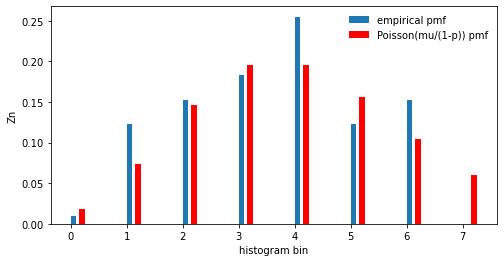

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Ntraj= 100 #specify the number of trajectories (Ntraj=1 for a single trajectory)
Ngen= 10 #specify the number of generations (be careful to not select Ngen too large when your the population explodes in time)
Z_array = np.zeros((Ntraj, Ngen), dtype=int) #Record all the trajectories

p = 3/4 #Specify the parameter of the binomial e.g. 1/4.
mu = 1 #Specify the parameter of the Poisson e.g. 1.

for n in range(Ntraj):
    
    Z=[]
    Z.append(1) # Initialize

    # Run the process 
    for i in range(Ngen-1):
        # Creating the next generation
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        # We look at the offspring of each individual of the last generation computed.
        next_gen = np.sum(np.random.binomial(1, p, size=Z[-1])) # ADD SOLUTION HERE
        immigrants = np.random.poisson(mu) #ADD SOLUTION HERE
        Z.append(next_gen+immigrants)
        # Increment counter
        i+=1
    
    Z_array[n,:len(Z)]=Z 

# Plot the Normalized histogram and compare with a Poisson pmf
#See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
m=max(Z_array[:,-1])
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("histogram bin")
ax.set_ylabel("Zn")
plt.hist(Z_array[:,-1],bins=np.arange(m), density=True, width=0.1,label='empirical pmf')
poisson_pmf = st.poisson.pmf(np.arange(m),mu/(1-p)) #ADD SOLUTION HERE
plt.bar(np.arange(m)+0.2, poisson_pmf,color='r',width = 0.1, label='Poisson(mu/(1-p)) pmf')
ax.legend(loc='best', frameon=False)



This plot shows that $Z_n$ can be approximated by a $Poisson\left(\frac{\mu}{1-p}\right)$.